# CVAE

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler

import base
import cvae
import importlib
importlib.reload(cvae)

<module 'cvae' from '../src/cvae.py'>

## Create the data

In [11]:
data, conditions = make_circles(n_samples=10000, noise=0.05, factor=0.5)

# We normalise the data to [0, 1]^2
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [9]:
#conditions

array([0, 0, 0, ..., 1, 1, 0])

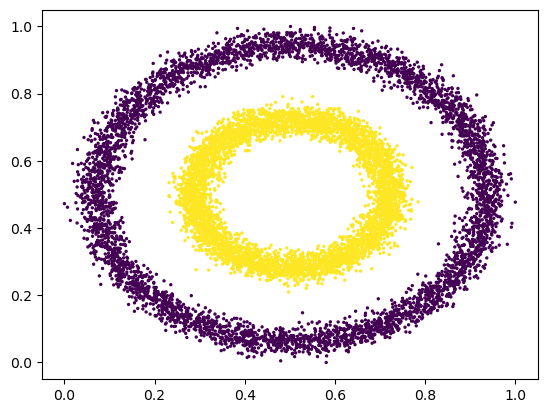

In [12]:
# Plot dataset
plt.scatter(*data.T, c=conditions, s=2)
plt.show()

# Train the CVAE

In [13]:
generator = cvae.CVAE(n_latent=4, alpha=0.02)
generator.train(data, data_cond=conditions.reshape(-1, 1),
                n_epochs=10000)

/home/wquan/.conda/envs/tf2new/lib/python3.7/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:329: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '
/home/wquan/.conda/envs/tf2new/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/wquan/.conda/envs/tf2new/lib/python3.7/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '


Training:   0%|          | 0/10000 [00:00<?, ?it/s]

# Generate samples

In [14]:
outer_circle_generated = generator.generate((0,), n_samples=2000)
inner_circle_generated = generator.generate((1,), n_samples=2000)

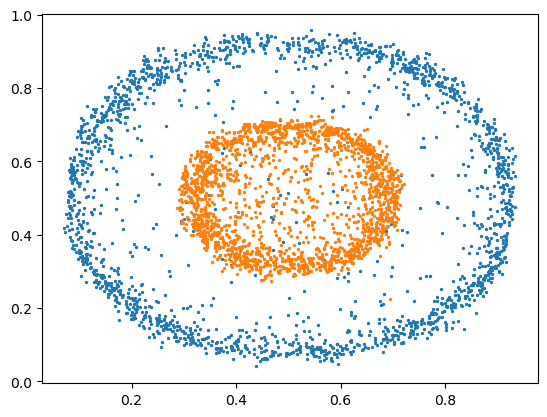

In [15]:
plt.scatter(*outer_circle_generated.T, s=2)
plt.scatter(*inner_circle_generated.T, s=2)
plt.show()